In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ethereum-data/ETH-USD.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 62 kB 318 kB/s 


In [4]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(35,10)})

# Getting first insights on data

## Loading in dataset

In [5]:
eth = pd.read_csv('../input/ethereum-data/ETH-USD.csv')
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


## Basic information on dataset

In [6]:
eth.shape

(2181, 7)

In [7]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2181 non-null   object 
 1   Open       2177 non-null   float64
 2   High       2177 non-null   float64
 3   Low        2177 non-null   float64
 4   Close      2177 non-null   float64
 5   Adj Close  2177 non-null   float64
 6   Volume     2177 non-null   float64
dtypes: float64(6), object(1)
memory usage: 119.4+ KB


In [8]:
eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,398.054460,413.880550,380.314871,399.066543,399.066543,7.125412e+09
std,618.185352,646.694116,585.147027,619.488385,619.488385,1.065180e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,13.864300,14.373900,13.254300,13.883900,13.883900,3.911200e+07
50%,200.608871,206.361450,194.783997,200.634995,200.634995,2.201160e+09
75%,391.488617,405.616364,381.273834,392.189972,392.189972,9.818257e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


## Converting Date column to Datatime and setting it as index

In [9]:
eth.Date = pd.to_datetime(eth.Date)


In [10]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2181 non-null   datetime64[ns]
 1   Open       2177 non-null   float64       
 2   High       2177 non-null   float64       
 3   Low        2177 non-null   float64       
 4   Close      2177 non-null   float64       
 5   Adj Close  2177 non-null   float64       
 6   Volume     2177 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 119.4 KB


In [11]:
eth.set_index('Date', inplace=True)

In [12]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


## Finding missing values

In [13]:
eth[eth.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


Because there are 4 rows that contains every single value missing there are few possibilities. First we could drop those 4 rows and move on. Secondly, I could find those values and fill them. I will choose the second option and fill missing values from internet.

In [14]:
eth.loc['2020-10-07' :'2020-10-15', :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-07,341.091675,342.591248,335.533600,342.119781,342.119781,1.053712e+10
2020-10-08,342.094971,352.800385,336.497101,351.455658,351.455658,1.151102e+10
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-10,365.402466,378.267151,365.354034,370.967590,370.967590,1.361848e+10
2020-10-11,370.928436,377.246796,369.828033,375.142059,375.142059,1.258451e+10
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-14,381.971466,387.296173,374.175018,379.484039,379.484039,1.391885e+10
2020-10-15,379.192230,381.208771,371.354126,377.441833,377.441833,1.496418e+10


data taken from: https://www.investing.com/crypto/ethereum/historical-data

In [15]:
eth.loc['2020-10-09', 'Open':'Volume'] = [350.71, 368.18, 347.82, 365.28, np.nan, 7850000]
eth.loc['2020-10-12', 'Open':'Volume'] = [374.39, 394.58, 366.05, 386.68, np.nan, 10390000]
eth.loc['2020-10-13', 'Open':'Volume'] = [386.64,387.06,374.57,381.32, np.nan, 7920000]
eth.loc['2020-04-17', 'Open':'Volume'] = [172.32,174.52,168.55,180.63, np.nan, 20050000]

In [16]:
eth.loc['2020-10-07' :'2020-10-15', :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-07,341.091675,342.591248,335.533600,342.119781,342.119781,1.053712e+10
2020-10-08,342.094971,352.800385,336.497101,351.455658,351.455658,1.151102e+10
2020-10-09,350.710000,368.180000,347.820000,365.280000,NaN,7.850000e+06
2020-10-10,365.402466,378.267151,365.354034,370.967590,370.967590,1.361848e+10
2020-10-11,370.928436,377.246796,369.828033,375.142059,375.142059,1.258451e+10
2020-10-12,374.390000,394.580000,366.050000,386.680000,NaN,1.039000e+07
2020-10-13,386.640000,387.060000,374.570000,381.320000,NaN,7.920000e+06
2020-10-14,381.971466,387.296173,374.175018,379.484039,379.484039,1.391885e+10
2020-10-15,379.192230,381.208771,371.354126,377.441833,377.441833,1.496418e+10


# Price Changes

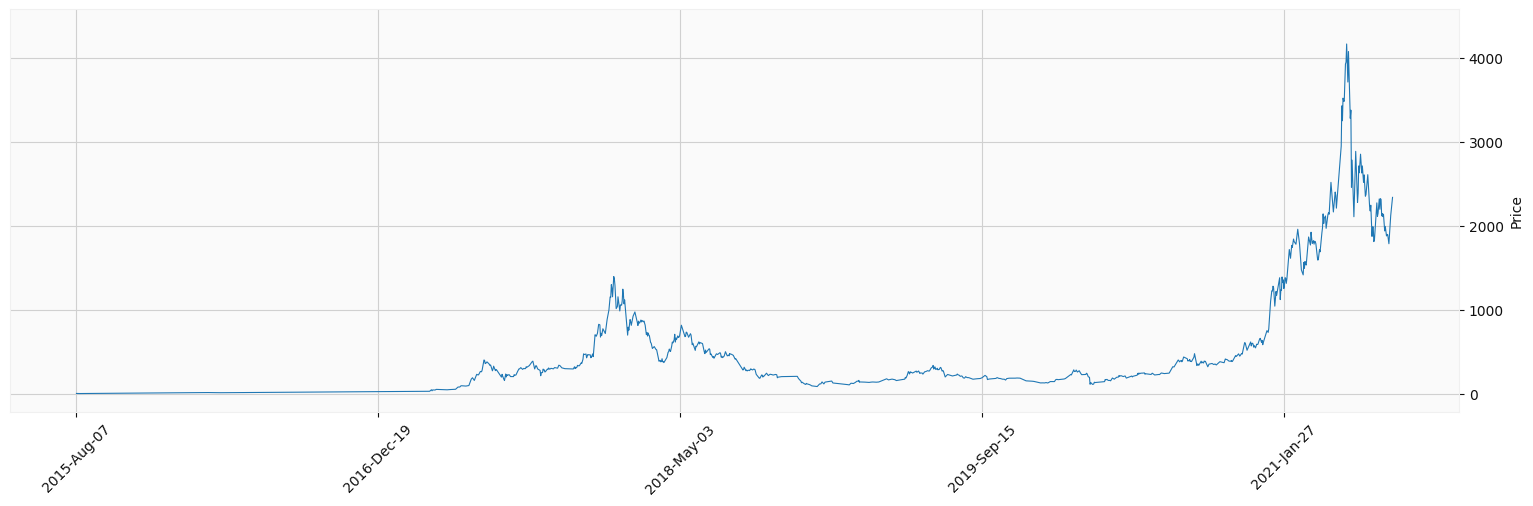

In [17]:
mpf.plot(eth, type='line', style='yahoo', figratio=(35,10))

## Price Changes in 2017

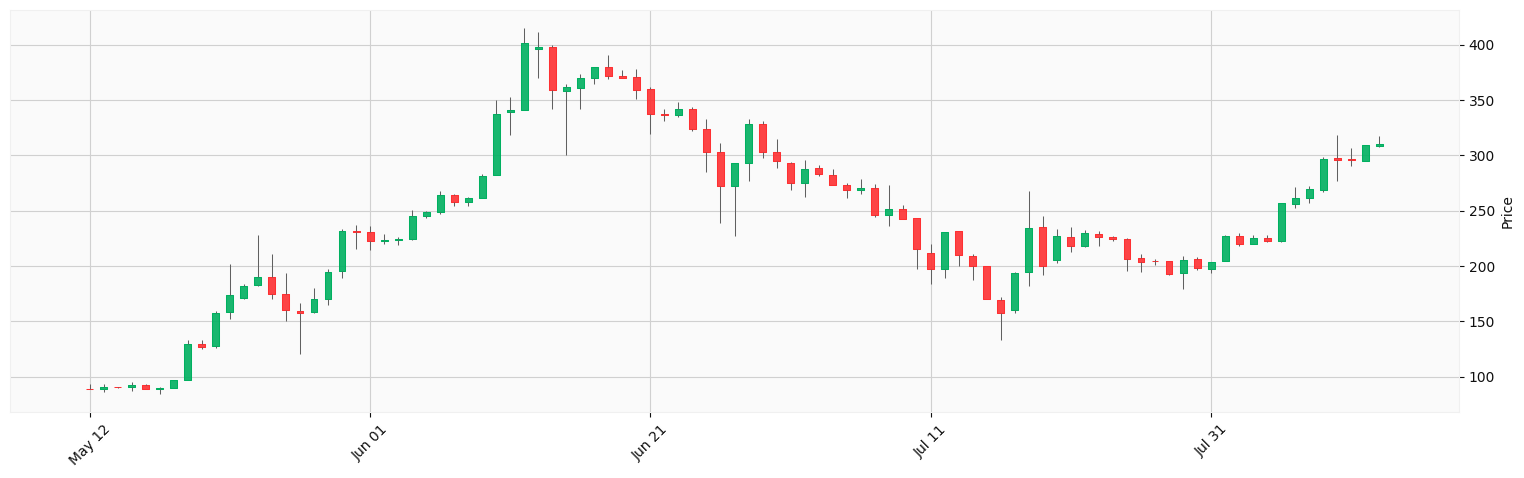

In [18]:
mpf.plot(eth.loc['2017-05-12':'2017-08-12', :], type='candle', style='yahoo', figratio=(35,10))

## Price Changes in 2021

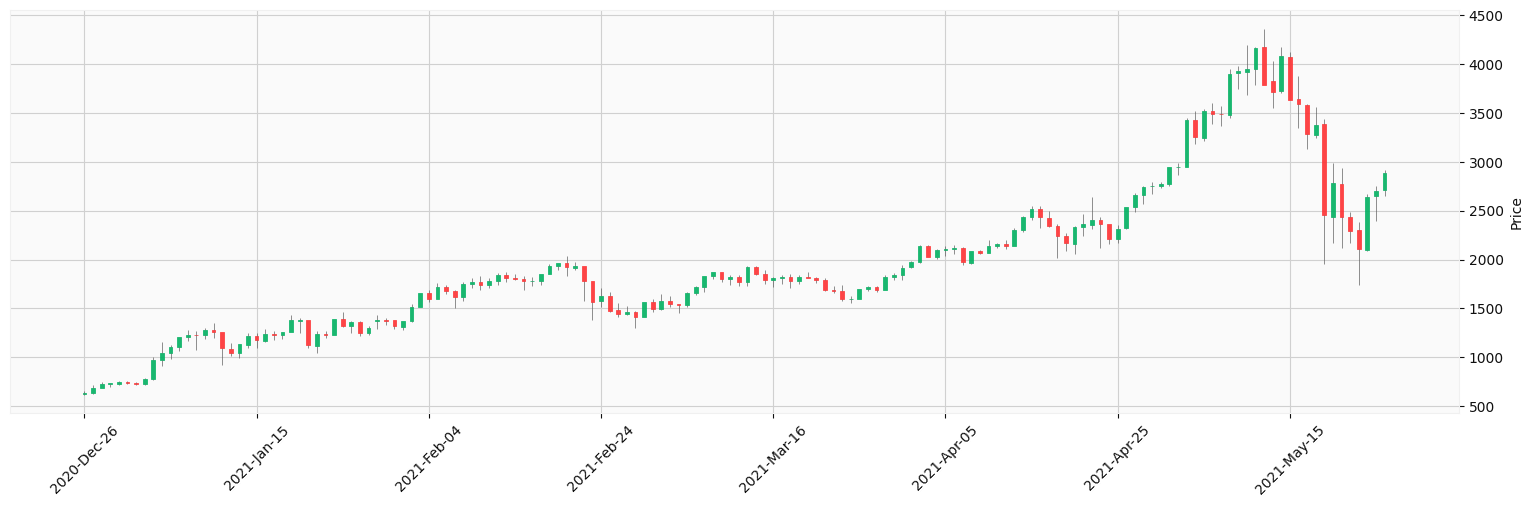

In [19]:
mpf.plot(eth.loc['2020-12-26':'2021-05-26', :], type='candle', style='yahoo', figratio=(35,10))

# Volume Traded

## Average Valume Traded Each Month

In [20]:
# Finding average valume traded each month
avg_vol = eth.groupby([eth.index.year,eth.index.month]).mean()

In [21]:
avg_vol.sort_values('Volume').tail()

Open         High          Low        Close    Adj Close  \
Date Date                                                                    
2021 6     2349.590800  2436.047673  2230.221659  2335.792391  2335.792391   
     4     2269.130294  2358.593412  2188.690780  2297.672754  2297.672754   
     2     1696.234375  1762.362026  1611.841108  1699.808921  1699.808921   
     1     1184.997553  1258.106819  1109.896723  1201.393435  1201.393435   
     5     3142.513688  3342.987061  2894.248913  3140.730760  3140.730760   

                 Volume  
Date Date                
2021 6     2.711744e+10  
     4     3.317781e+10  
     2     3.598993e+10  
     1     3.828379e+10  
     5     4.872032e+10

In [22]:
avg_vol.index.names = ['Year', 'Month']
avg_vol.reset_index(inplace=True)

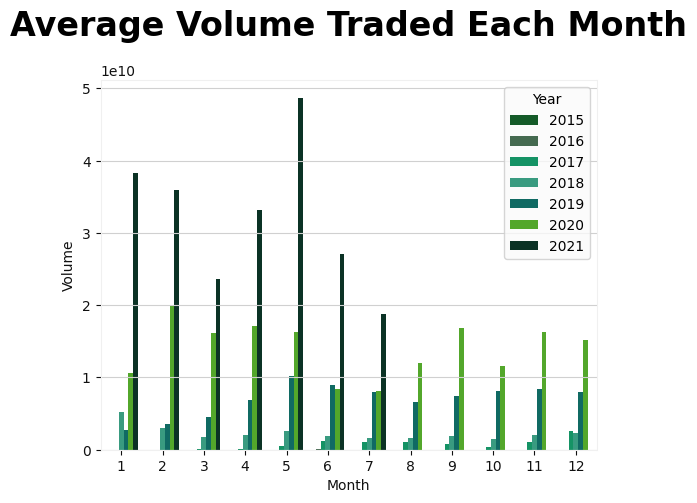

In [23]:
ax = sns.barplot(x='Month', y='Volume', hue='Year', data=avg_vol, palette=['#086623','#3F704D','#00A86B','#29AB87','#01796F','#4CBB17','#043927'])
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)

ax = plt.title('Average Volume Traded Each Month', fontsize=24, loc='center', fontweight='heavy', pad=32)

## Etheruem Volumes Traded

In [24]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [25]:
df = pd.pivot_table(eth, values='Volume', index=[eth.index.year, eth.index.month], aggfunc=np.sum)
df.index.names = ['Year','Month']
df.reset_index(inplace=True)

df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df.drop(columns=['Year', 'Month'], inplace=True)

df['Date'] = pd.to_datetime(df.Date)
df['Date'] = df['Date'].dt.strftime('%Y-%m')


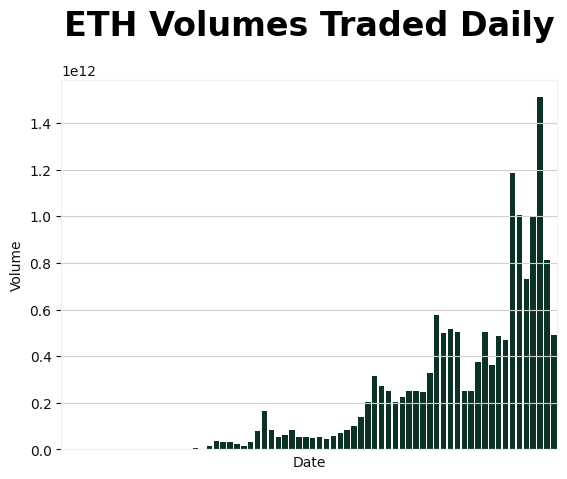

In [26]:
ax = sns.barplot(x='Date', y='Volume', data=df, color='#043927')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.xticks([])
ax = plt.title('ETH Volumes Traded Daily', fontsize=24, loc='center', fontweight='heavy', pad=32)

# Which day/month/year was most/less profitable to invest?

## Daily ROI

In [27]:
eth['Daily_ROI'] = (eth.Close/eth.Open*100)-100

In [28]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_ROI
Date,,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,-2.101271
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,-73.035443
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,-0.600309
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,-0.776062
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,50.809152


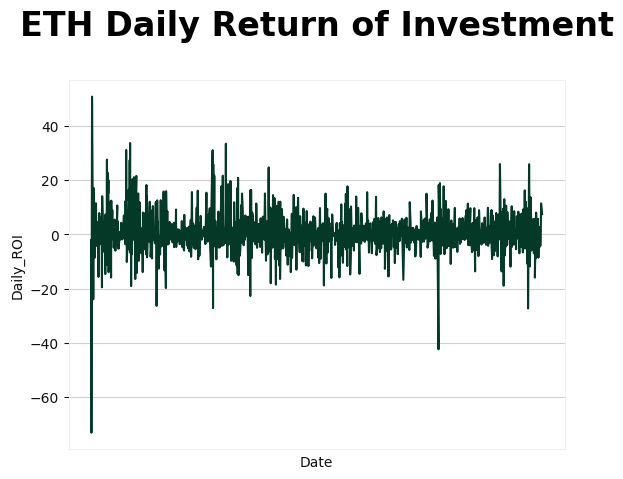

In [29]:
ax = sns.lineplot(x=eth.index, y=eth.Daily_ROI, data=eth, color='#043927')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.xticks([])
ax = plt.title('ETH Daily Return of Investment', fontsize=24, loc='center', fontweight='heavy', pad=32)

### 5 Most Profitable Days to invest

In [30]:
eth.Daily_ROI.sort_values(ascending=False).head()

Date
2015-08-11    50.809152
2015-08-13    49.534461
2016-02-11    33.718939
2017-05-19    33.460332
2016-01-23    31.151105
Name: Daily_ROI, dtype: float64

### 5 Least Profitable Days to invest

In [31]:
eth.Daily_ROI.sort_values().head()

Date
2015-08-08   -73.035443
2020-03-12   -42.308851
2021-05-19   -27.256029
2017-03-18   -27.123666
2016-06-18   -26.321642
Name: Daily_ROI, dtype: float64

## Monthly ROI

In [32]:
eth.reset_index(inplace=True)
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_ROI
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,-2.101271
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,-73.035443
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,-0.600309
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,-0.776062
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,50.809152


In [33]:
grouped = eth.groupby([eth.Date.dt.year, eth.Date.dt.month])
monthly_roi = grouped.last().Close / grouped.first().Open * 100 - 100

In [34]:
monthly_roi.index.names = ['Year', 'Month']

In [35]:
monthly_roi = monthly_roi.to_frame()
monthly_roi.reset_index(inplace=True)
monthly_roi.head()

,Year,Month,0
0,2015,8,-52.033112
1,2015,9,-45.426308
2,2015,10,24.828852
3,2015,11,-5.183054
4,2015,12,6.287714


In [36]:
monthly_roi.columns = ['Year', 'Month', 'Monthly_ROI']
monthly_roi.head()

,Year,Month,Monthly_ROI
0,2015,8,-52.033112
1,2015,9,-45.426308
2,2015,10,24.828852
3,2015,11,-5.183054
4,2015,12,6.287714


## Plotting monthly ROI

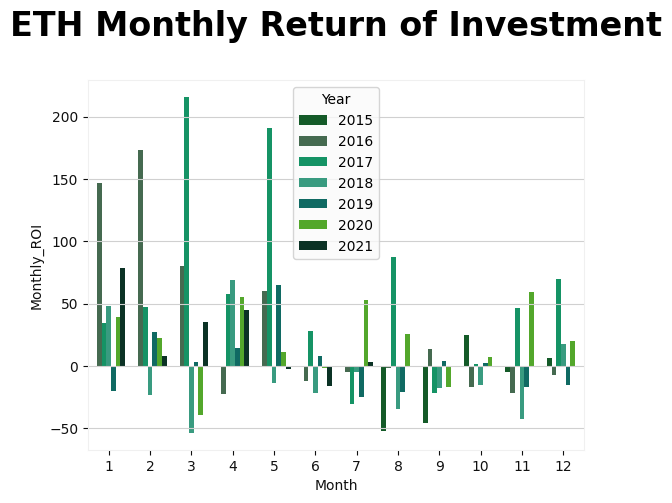

In [37]:
ax = sns.barplot(x='Month', y='Monthly_ROI', hue='Year', data=monthly_roi, palette=['#086623','#3F704D','#00A86B','#29AB87','#01796F','#4CBB17','#043927'])
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.title('ETH Monthly Return of Investment', fontsize=24, loc='center', fontweight='heavy', pad=32)

### 5 Most Profitable Months to Invest

In [38]:
monthly_roi.sort_values('Monthly_ROI', ascending=False).head(5)

,Year,Month,Monthly_ROI
19,2017,3,215.748523
21,2017,5,190.802253
6,2016,2,173.182624
5,2016,1,146.975513
24,2017,8,87.134558


### 5 Least Profitable Months to Invest

In [39]:
monthly_roi.sort_values('Monthly_ROI').head(5)

,Year,Month,Monthly_ROI
31,2018,3,-53.685580
0,2015,8,-52.033112
1,2015,9,-45.426308
39,2018,11,-42.708751
55,2020,3,-39.207311


## Yearly ROI

In [40]:
yearly_roi = eth.groupby(eth.Date.dt.year).last().Close / eth.groupby(eth.Date.dt.year).first().Open * 100 - 100

### 3 Most Profitable Years to Invest

In [41]:
yearly_roi.sort_values(ascending=False).head(3)

Date
2017    9380.125064
2016     753.485871
2020     469.158099
dtype: float64

### 3 Least Profitable Years to Invest

In [42]:
yearly_roi.sort_values().head(3)

Date
2018   -82.353024
2015   -67.031523
2019    -2.853657
dtype: float64

## Plotting yearly ROI

- keep in mind that it counts if you bought it at the first day in the year and sold on the last day of the year

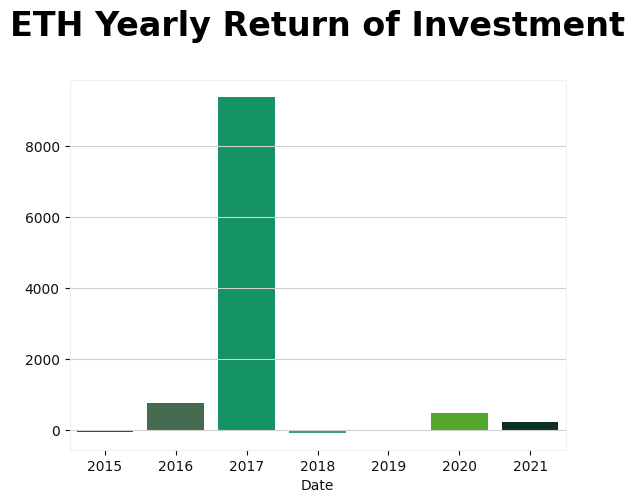

In [43]:
ax = sns.barplot(x=yearly_roi.index, y=yearly_roi.values,palette=['#086623','#3F704D','#00A86B','#29AB87','#01796F','#4CBB17','#043927'])
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.title('ETH Yearly Return of Investment', fontsize=24, loc='center', fontweight='heavy', pad=32)

The year 2017 had a huge bubble in crypro currencies space. We can see from graph above. Lets exclude it from graph to get a bigger picture at other years

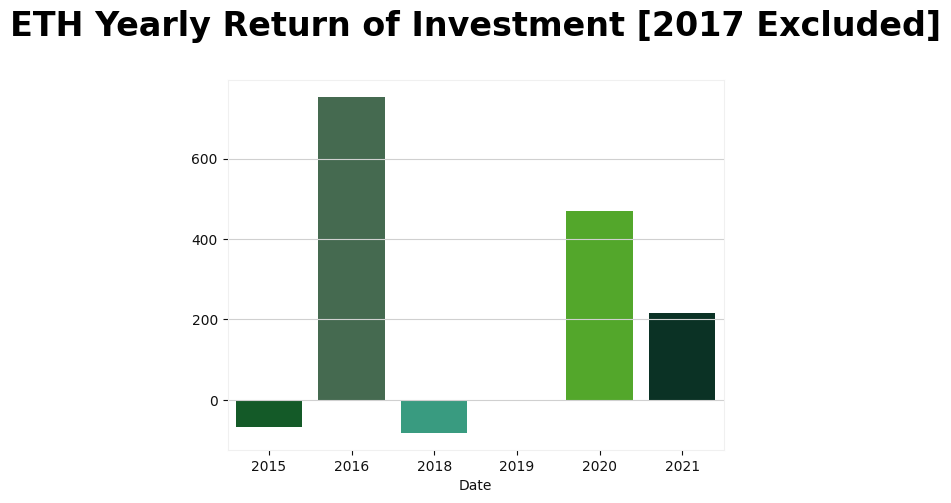

In [44]:
excluded_2017 = yearly_roi[yearly_roi.index != 2017]
ax = sns.barplot(x=excluded_2017.index, y=excluded_2017.values, palette=['#086623','#3F704D', '#29AB87','#01796F','#4CBB17','#043927'])
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.title('ETH Yearly Return of Investment [2017 Excluded]', fontsize=24, loc='center', fontweight='heavy', pad=32)

## Keep in Mind

ROI calculations was based on the assumption that you bought it when market opened and sold right when the market was closing. For monthly and yealy ROI assumptions were made that ETH was bought at the start of the Month/Year and sold at the end.

# Correlation

In [45]:
eth_corr = eth.loc[:,['Open','High', 'Low', 'Close', 'Volume']].corr()
eth_corr

,Open,High,Low,Close,Volume
Open,1.000000,0.998889,0.997191,0.996843,0.767281
High,0.998889,1.000000,0.997174,0.998521,0.771315
Low,0.997191,0.997174,1.000000,0.998584,0.756480
Close,0.996843,0.998521,0.998584,1.000000,0.765051
Volume,0.767281,0.771315,0.756480,0.765051,1.000000


In [46]:
sns.reset_orig()

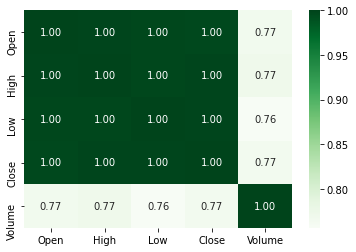

In [47]:
ax = sns.heatmap(eth_corr, annot=True, cmap='Greens', fmt=".2f")

# Model Training

In [48]:
eth.drop(columns=['Adj Close', 'Daily_ROI'], inplace=True)
eth.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [49]:
eth_sklearn = eth.loc[:,'Open':]
eth_sklearn

,Open,High,Low,Close,Volume
0,2.831620,3.536610,2.521120,2.772120,1.643290e+05
1,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2,0.706136,0.879810,0.629191,0.701897,5.321700e+05
3,0.713989,0.729854,0.636546,0.708448,4.052830e+05
4,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...
2176,1994.822876,2044.116455,1954.297852,2025.202759,1.749548e+10
2177,2025.105713,2129.441162,2000.436279,2124.776611,1.620039e+10
2178,2123.961182,2197.649414,2107.323486,2189.218750,1.605745e+10
2179,2187.145508,2194.438232,2108.829834,2191.373779,1.456648e+10


In [50]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

## LinearRegression (Without any optimizations)

In [51]:
X_1, y_1 = eth_sklearn.drop(columns=['High']), eth_sklearn.High

xtrain, xtest, ytrain, ytest = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1461, 4), (720, 4), (1461,), (720,))

In [52]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

predicted_train = lr.predict(xtrain)
predicted_test = lr.predict(xtest)

print(f"RMSE on train data: {mean_squared_error(ytrain, predicted_train)**(0.5)}, R^2: {r2_score(ytrain, predicted_train)}")
print(f"RMSE on test data: {mean_squared_error(ytest, predicted_test)**(0.5)}, R^2: {r2_score(ytest, predicted_test)}")

RMSE on train data: 14.499161634874854, R^2: 0.9994814871760181
RMSE on test data: 19.843934687514007, R^2: 0.9991076716908969


In [53]:
lr.predict([[2530.94, 2515.26, 2594.81, 853190]]) #Current high price was 2636.21

array([2638.09676962])

In [54]:
lr.predict([[2461.08,2421.70,2532.19,507080]]) # Jul 31 high price was 2551.68

array([2581.44626366])

In [55]:
lr.predict([[2380.59,2320.80,2460.95,1003000]]) # Jul 30 high price was 2467.40

array([2514.21307343])

# Real values vs Predicted values

In [56]:
combined = pd.concat([xtrain,xtest], axis=0)

In [57]:
combined_high = np.concatenate((predicted_train, predicted_test), axis=0)

In [58]:
combined['High'] = combined_high
combined.sort_index(inplace=True)
combined.head()

,Open,Low,Close,Volume,High
0,2.831620,2.521120,2.772120,164329.0,2.041788
1,2.793760,0.714725,0.753325,674188.0,1.168494
2,0.706136,0.629191,0.701897,532170.0,-0.176031
3,0.713989,0.636546,0.708448,405283.0,-0.168824
4,0.708087,0.663235,1.067860,1463100.0,0.092269


In [59]:
combined['Date'] = eth.Date
combined.head()

,Open,Low,Close,Volume,High,Date
0,2.831620,2.521120,2.772120,164329.0,2.041788,2015-08-07
1,2.793760,0.714725,0.753325,674188.0,1.168494,2015-08-08
2,0.706136,0.629191,0.701897,532170.0,-0.176031,2015-08-09
3,0.713989,0.636546,0.708448,405283.0,-0.168824,2015-08-10
4,0.708087,0.663235,1.067860,1463100.0,0.092269,2015-08-11


In [60]:
eth.head()

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0


In [61]:
sns.set(rc={'figure.figsize':(35,10)})

## Plotting

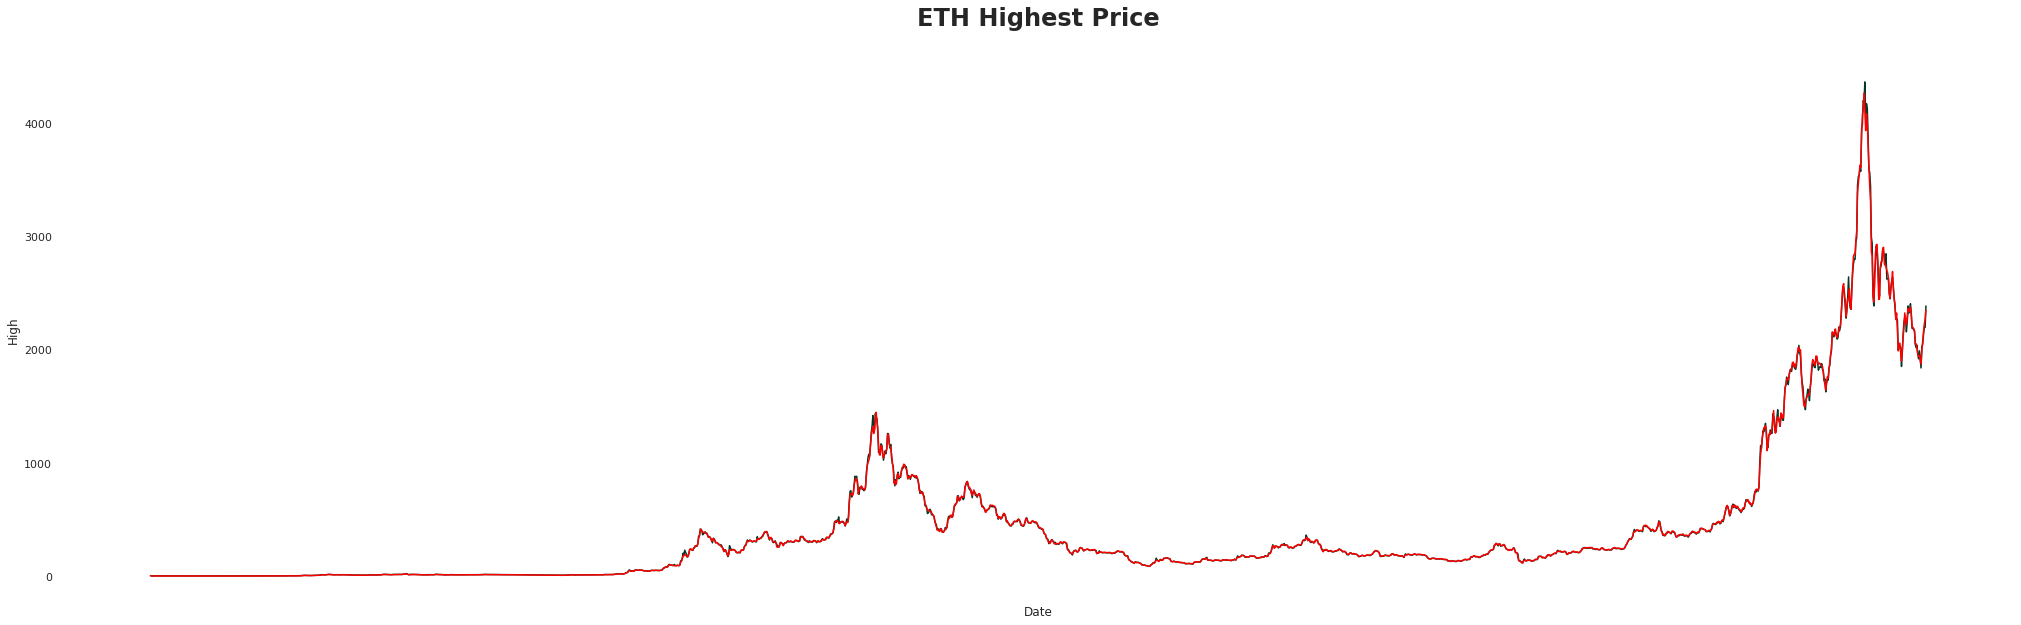

In [62]:
ax = sns.lineplot(x='Date', y='High', data=eth, color='#043927')
sns.lineplot(x='Date', y='High', data=combined, color='red')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.xticks([])
ax = plt.title('ETH Highest Price', fontsize=24, loc='center', fontweight='heavy', pad=32)

# Plotting zoomed in on two spikes

In [63]:
eth.set_index('Date', inplace=True)
combined.set_index('Date', inplace=True)

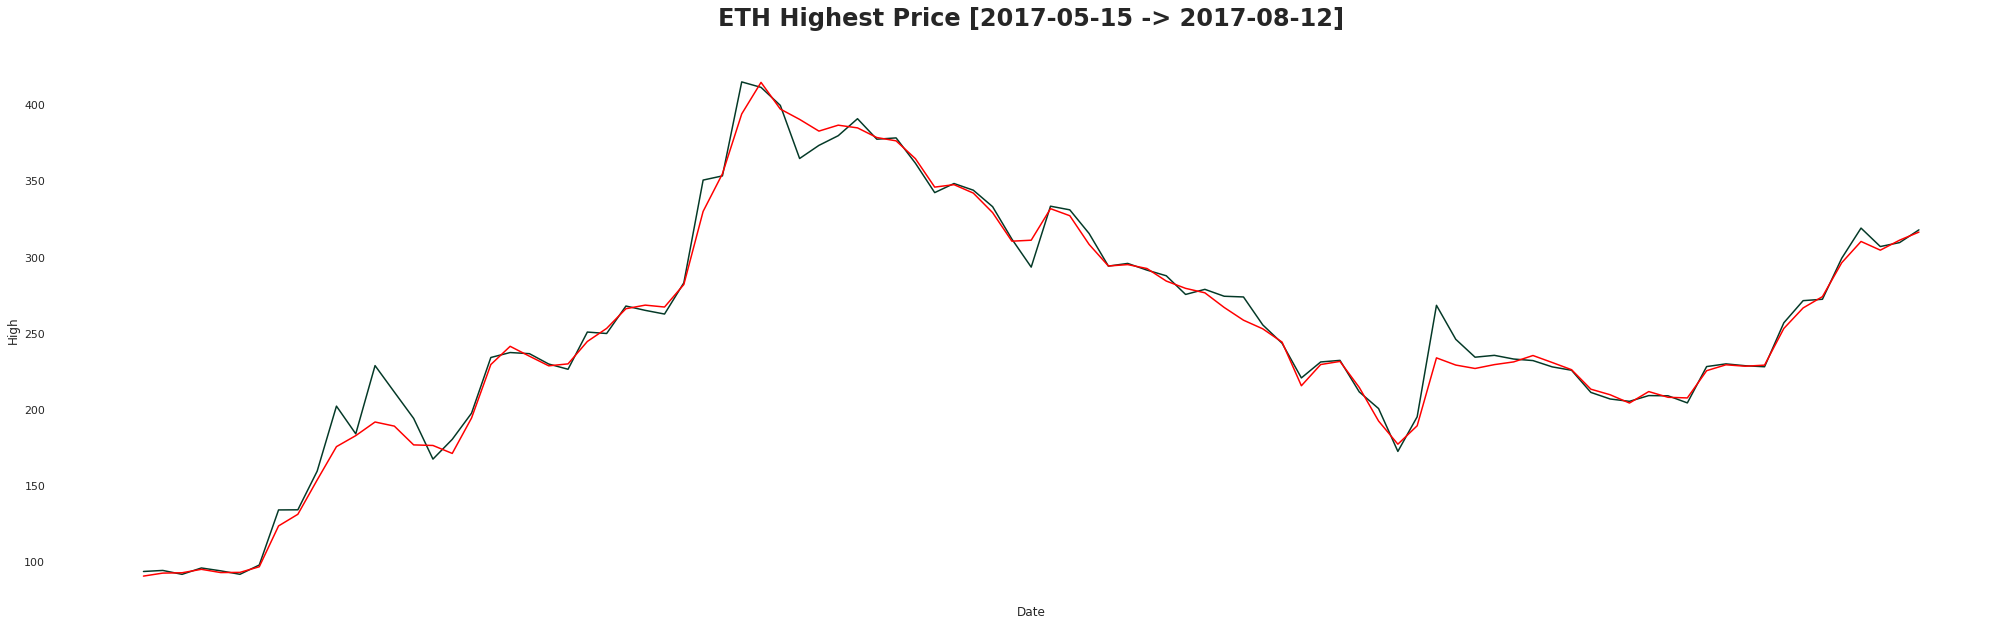

In [64]:
ax = sns.lineplot(x='Date', y='High', data=eth.loc['2017-05-12':'2017-08-12', :], color='#043927')
sns.lineplot(x='Date', y='High', data=combined.loc['2017-05-12':'2017-08-12', :], color='red')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.xticks([])
ax = plt.title('ETH Highest Price [2017-05-15 -> 2017-08-12]', fontsize=24, loc='center', fontweight='heavy', pad=32)

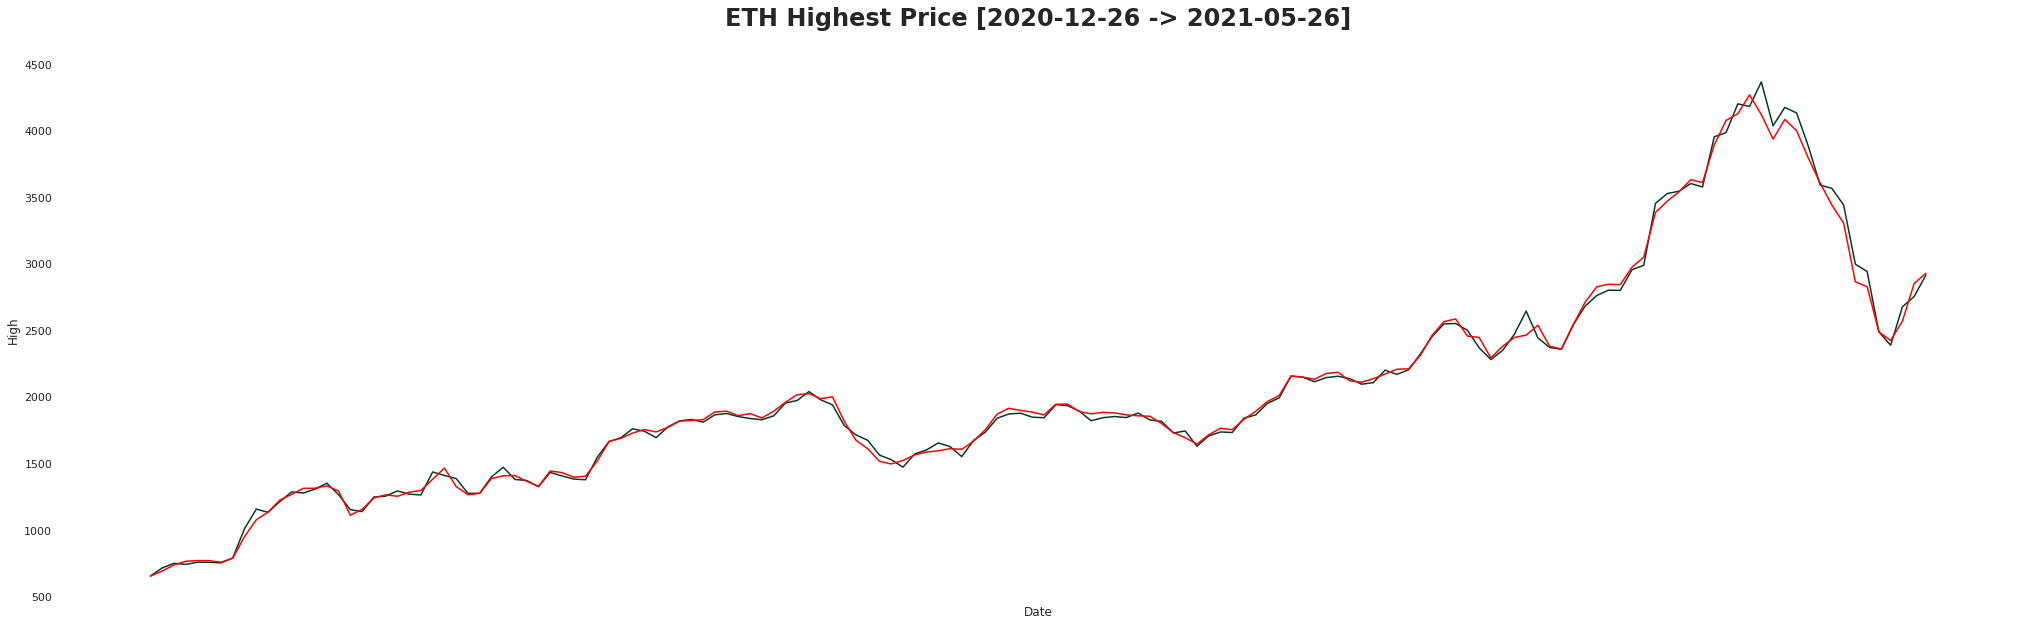

In [65]:
ax = sns.lineplot(x='Date', y='High', data=eth.loc['2020-12-26':'2021-05-26', :], color='#043927')
sns.lineplot(x='Date', y='High', data=combined.loc['2020-12-26':'2021-05-26', :], color='red')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax = plt.xticks([])
ax = plt.title('ETH Highest Price [2020-12-26 -> 2021-05-26]', fontsize=24, loc='center', fontweight='heavy', pad=32)

# Final toughts

Thanks [Arpit Verma](https://www.kaggle.com/varpit94) for this dataset that I could practise.

The things I could improve:
- Set a clear goals before starting workign with data
    - Questions
    - Assumptions
- Work more on data processing
- Hyperparameters tuning
- Write more about my process and the results that I got.

If anyone have any comments or suggestions please and thank you. I will read every single one.